# Explore `Mauna Loa (MLO)` data in NOAA - $CO_2$ ObsPack

From <https://www.esrl.noaa.gov/gmd/ccgg/obspack/release_notes.html#obspack_co2_1_GLOBALVIEWplus>:

The Digital Object Identifier (DOI) metadata for this product and required citation is at https://search.datacite.org/works/10.25925/20200903.  

This product includes 471 atmospheric carbon dioxide datasets derived from observations made by 54 laboratories from 21 countries. Data for the period 1957-2019 (where available) are included. 

A full list of data providers is at providerlist/obspack_co2_1_GLOBALVIEWplus_v6.0_2019-09-11.html

**Septmeber 30, 2020**: Created  

## Setup

In [1]:
import os
import math
import glob
from textwrap import wrap

In [2]:
import datetime as dt
from datetime import date

today = date.today()

In [3]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import xarray as xr

In [4]:
import matplotlib
from matplotlib import cm
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import BoundaryNorm

In [5]:
import seaborn as sns

In [6]:
import altair as alt
# alt.renderers.enable('notebook')
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [7]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [8]:
from metpy.interpolate import (interpolate_to_grid, remove_nan_observations,
                               remove_repeat_coordinates)
from metpy.plots import ContourPlot, ImagePlot, MapPanel, PanelContainer

In [9]:
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

In [10]:
from co2_diag import obspack_subset as ops, nums

In [11]:
from co2_diag import obspack_anomalies as opa

## Data import

In [12]:
datadir  = '/Users/kauf418/projects/e3sm_co2_transport_evaluation/2_ExperimentFolder/raw_data/noaa-obspack/obspack_co2_1_GLOBALVIEWplus_v6.0_2020-09-11/data/nc/'

In [13]:
# native_file = 'co2_mlo_surface-insitu_1_allvalid.nc'
native_file = 'co2_mlo_surface-flask_426_representative.nc'
native_file = 'co2_mlo_surface-flask_426_representative.nc'

In [14]:
ds = xr.open_dataset(datadir + native_file)
ds

<xarray.Dataset>
Dimensions:                     (calendar_components: 6, dim_concerns: 5, obs: 2159)
Dimensions without coordinates: calendar_components, dim_concerns, obs
Data variables:
    time                        (obs) datetime64[ns] ...
    start_time                  (obs) datetime64[ns] ...
    midpoint_time               (obs) datetime64[ns] ...
    datetime                    (obs) |S100 ...
    time_decimal                (obs) float64 ...
    time_components             (obs, calendar_components) float64 ...
    solartime_components        (obs, calendar_components) float64 ...
    value                       (obs) float32 ...
    nvalue                      (obs) float64 ...
    latitude                    (obs) float32 ...
    longitude                   (obs) float32 ...
    altitude                    (obs) float32 ...
    elevation                   (obs) float32 ...
    intake_height               (obs) float32 ...
    obs_flag                    (obs) float64 ...
    assimilation_concerns       (obs, dim_concerns) int32 ...
    obs_num                     (obs) int32 ...
    obspack_num                 (obs) int32 ...
    obspack_id                  (obs) |S200 ...
    unique_sample_location_num  (obs) int32 ...
    CT_RMSE                     (obs) float32 ...
    CT_assim                    (obs) int32 ...
    CT_MDM                      (obs) float32 ...
    CT_sampling_strategy        (obs) int32 ...
    CT_may_localize             (obs) int32 ...
    CT_may_reject               (obs) int32 ...
Attributes:
    site_code:                                    MLO
    site_name:                                    Mauna Loa, Hawaii
    site_country:                                 United States
    site_country_flag:                            UNST0001.GIF
    site_latitude:                                19.5362
    site_longitude:                               -155.5763
    site_elevation:                               3397.0
    site_elevation_unit:                          masl
    site_position_comment:                        This is the nominal locatio...
    site_utc2lst:                                 -10.0
    site_utc2lst_comment:                         Add 'site_utc2lst' hours to...
    site_url:                                     http://www.esrl.noaa.gov/gm...
    dataset_creation_date:                        2020-09-11T18:02:08.200384
    dataset_num:                                  319
    dataset_name:                                 co2_mlo_surface-flask_426_r...
    dataset_globalview_prefix:                    mlo_426D0
    dataset_process:                              PassThru
    dataset_parameter:                            co2
    dataset_project:                              surface-flask
    dataset_platform:                             fixed
    dataset_map:                                  map_mlo_surface-flask_426.png
    dataset_selection:                            representative with outlier...
    dataset_selection_tag:                        representative
    dataset_comment:                              These atmospheric CO2 recor...
    dataset_calibration_scale:                    2008A SIO manometric mole f...
    dataset_start_date:                           1960-03-30T12:00:00Z
    dataset_stop_date:                            2019-12-26T19:50:00Z
    dataset_intake_ht:                            10.0
    dataset_intake_ht_unit:                       magl
    dataset_description:                          This data package is intend...
    dataset_usage_url:                            https://www.esrl.noaa.gov/g...
    dataset_usage_description:                    In addition to this product...
    dataset_provider_citation_1:                  C. D. Keeling, S. C. Piper,...
    dataset_identifier_1:                         []
    dataset_provider_citation_total:              1
    dataset_reference_total_listed:               0
    dataset_contribution:             

In [15]:
# # native_file = 'co2_mlo_surface-flask_2_representative.nc'
# # native_file = 'co2_mlo_surface-insitu_1_allvalid.nc'
# # native_file = 'co2_mlo_surface-flask_4_representative.nc'
# # native_file = 'co2_mlo_surface-flask_1_representative.nc'
# native_file = 'co2_mlo_surface-flask_426_representative.nc'
# ds = xr.open_dataset(datadir + native_file)

# # To convert to datetime64 data
# ds = xr.decode_cf(ds)
# ds = ds.set_coords(['time', 'time_decimal', 'latitude', 'longitude', 'altitude'])
# ds = ds.sortby(['time'])
# ds = ds.swap_dims({"obs": "time"})
# ppmfac = 1e6
# ds['value'] = ds['value']*ppmfac
# #
# min_time = ds['time_decimal'].min().values.item()

# fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(12, 6))
# varlist = ['time', 'time_decimal', 'value']
# #
# if bool(min_time <= 1974):
#     ds_sub = ds[varlist].where(ds['time_decimal'] <= 1974, drop=True)
#     axs[0].plot(ds_sub['time'], ds_sub['value'], 'o')
# else:
#     axs[0].text(0.2, 375, s=f"No data before 1974. Earliest is <{str(round(min_time))}>.")
# #
# ds_sub = ds[varlist].where(ds['time_decimal'] > 1974, drop=True)
# axs[1].plot(ds_sub['time'], ds_sub['value'], 'o')

In [154]:
file_list = glob.glob(datadir + 'co2_mlo*.nc')
print("files: ")
print(*[os.path.basename(x) for x in file_list], sep = "\n")

files: 
co2_mlo_surface-flask_2_representative.nc
co2_mlo_surface-insitu_1_allvalid.nc
co2_mlo_surface-flask_4_representative.nc
co2_mlo_surface-flask_1_representative.nc
co2_mlo_surface-flask_426_representative.nc


In [168]:
ds_list = []
vars_to_keep = ['value', 'nvalue''value_std_dev',
                'time', 'start_time', 'datetime', 'time_decimal', 
                'latitude', 'longitude', 'altitude', 
                'qcflag', 'dataset_platform', 'dataset_project']

for i, f in enumerate(file_list):
    
    thisds = xr.open_dataset(f, decode_times=False)
    
    if not ('qcflag' in thisds.keys()):
        blankarray = xr.DataArray(data=[np.nan], dims=('obs'), name='qcflag').squeeze()
        thisds = thisds.assign({'qcflag': blankarray})
    if not ('value_std_dev' in thisds.keys()):
        blankarray = xr.DataArray(data=[np.nan], dims=('obs'), name='value_std_dev').squeeze()
        thisds = thisds.assign({'value_std_dev': blankarray})
        
    # Retain only the chosen variables
    to_drop = []
    for vname in thisds.keys():
        if not (vname in vars_to_keep):
            to_drop.append(vname)
    newds = thisds.drop_vars(to_drop)
    
    n_obs = len(thisds['obs'])
    newds = newds.assign(dataset_platform=xr.DataArray([thisds.attrs['dataset_platform']] * n_obs, dims='obs'))
    newds = newds.assign(dataset_project=xr.DataArray([thisds.attrs['dataset_project']] * n_obs, dims='obs'))
    
    ds_list.append(newds)
    
#     if i > 100:
#         break
ds = xr.concat(ds_list, dim=('obs'))

# display(ds)


### Wrangling

Let's sort the observations by datetime, and set the `time` variable to be the dimension of the data.

In [169]:
def time_to_datetime64(dataset):
    # It is more convenient to work with the `time` variable as type `datetime64`.
    return xr.decode_cf(dataset)


ppmfac = 1e6
def co2_molfrac_to_ppm(dataset, co2var='value'):
    temp_ln = dataset[co2var].attrs["long_name"]

    # do the conversion
    dataset[co2var] = dataset[co2var]*ppmfac
    dataset[co2var].attrs.update({'units': 'ppm',
                                  'long_name': temp_ln})
    return dataset
    
# Do the things to the dataset.
ds = (ds
      .pipe(time_to_datetime64)
      .set_coords(['time', 'time_decimal', 'latitude', 'longitude', 'altitude'])
      .sortby(['time'])
      .swap_dims({"obs": "time"})
      .pipe(co2_molfrac_to_ppm, co2var='value')
     )

Where $CO_2$ is converted from units of $mol/mol$ to $ppm$

\begin{array}{lllll}
    ppmfac = & \times \frac{1e6\,mol_{air}}{1\,mol_{CO_2}}
\end{array}

\begin{align}
    CO_2\,dry\,air\,mole\,fraction\,(i.e. \frac{mol_{CO_2}}{mol_{air}}) \times ppmfac & = ppm \\
\end{align}

In [170]:
# temp_ln = ds['value'].attrs["long_name"]

# # do the conversion
# ppmfac = 1e6
# ds['value'] = ds['value']*ppmfac
# ds['value'].attrs["units"] = 'ppm'
# ds['value'].attrs["long_name"] = temp_ln

### A brief look at the dataset

In [171]:
print(f"-Values-")
print(f"min: {ds['value'].min().values.item()}")
print(f"mean: {ds['value'].mean().values.item()}")
print(f"max: {ds['value'].max().values.item()}")

-Values-
min: 312.6199951171875
mean: 366.68682861328125
max: 478.95001220703125


In [172]:
print(f"Earliest date: {pd.to_datetime(str(ds['time'].min().values))} (or {round(ds['time_decimal'].min().values.item(), 2)})\n"
      f"Latest date:   {pd.to_datetime(str(ds['time'].max().values))} (or {round(ds['time_decimal'].max().values.item(), 2)})")

Earliest date: 1960-03-30 12:00:00 (or 1960.24)
Latest date:   2019-12-31 23:30:00 (or 2020.0)


The data span quite a long timeseries.  
However, notice how the data are very sparse before 1974

In [173]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})

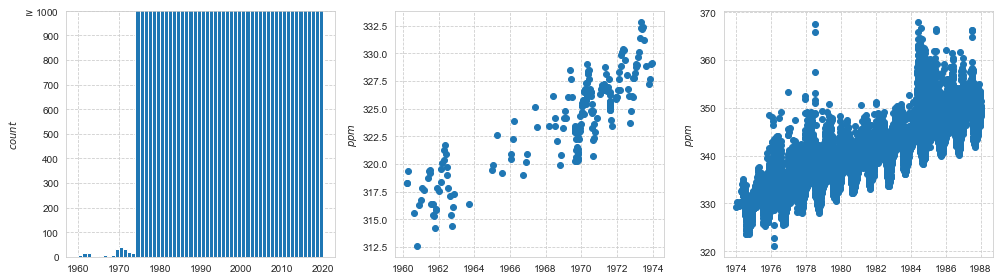

In [174]:
fig, axs = plt.subplots(ncols=3, sharey=False, figsize=(14, 4))

# Plot
ph = axs[0].hist(ds['time_decimal'].values, bins=list(range(1960, 2020+1, 1))) 
axs[0].set_ylim((0, 500))
axs[0].set_ylabel('$count$')

xs = list(range(0, 1100, 100))
nticks = len(axs[0].get_yticks())
axs[0].set_yticks(xs)
# labels = [item.get_text() for item in axs[0].get_yticklabels()]
labels = [str(item) for item in xs]
labels[-1] = r'$\geq$1000'
axs[0].set_yticklabels(labels)
fig.canvas.draw()

#
tempmask = ds['time_decimal'] >= 1960
tempmask = tempmask & (ds['time_decimal'] < 1974)
ds_sub = ds[['time', 'time_decimal', 'value']].where(tempmask, drop=True)
ph = axs[1].plot(ds_sub['time'], ds_sub['value'], 'o')
axs[1].set_ylabel('$ppm$')
#
tempmask = ds['time_decimal'] >= 1974
tempmask = tempmask & (ds['time_decimal'] < 1988)
ds_sub = ds[['time', 'time_decimal', 'value']].where(tempmask, drop=True)
ph = axs[2].plot(ds_sub['time'], ds_sub['value'], 'o')
axs[2].set_ylabel('$ppm$')

plt.tight_layout()

### More looks

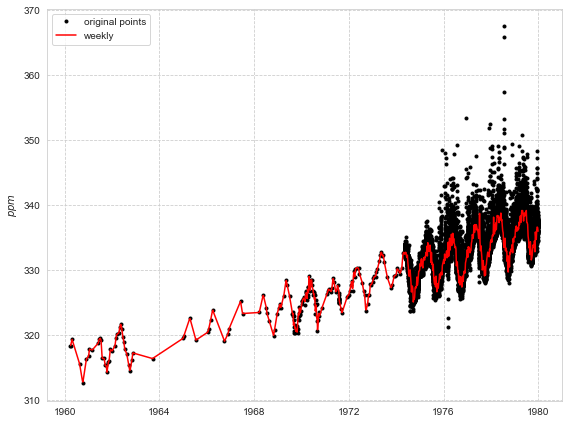

In [183]:

#
ds_sub = ds[['time', 'time_decimal', 'value']].copy()

# Drop duplicate times
_, index = np.unique(ds_sub['time'], return_index=True)
ds_sub = ds_sub.isel(time=index)

# varlist = ['time', 'time_decimal', 'value']
# ds_sub = ds[varlist]

# Select a time period
tempmask = ds_sub['time_decimal'] >= 1960 # 1960
tempmask = tempmask & (ds_sub['time_decimal'] < 1980)

# Get original temporal resolution
ds_prepd_orig = ds_sub.where(tempmask, drop=True).copy()
xv_orig = ds_prepd_orig['time']
yv_orig = ds_prepd_orig['value']

# Resample the time
ds_prepd_rs = ds_sub.where(tempmask, drop=True).copy()
ds_prepd_rs = ds_prepd_rs.resample(time="1W").interpolate("linear")  # weekly average
# ds_prepd = ds_sub.resample(time="1MS").mean()  # monthly average
# ds_prepd = ds_sub.resample(time="1AS").mean()  # yearly average
# ds_prepd = ds_sub.resample(time="Q").mean()  # quarterly average (consecutive three-month periods)
# ds_prepd = ds_sub.resample(time="QS-DEC").mean()  # quarterly average (consecutive three-month periods), anchored at December 1st.
#
ds_prepd_rs = ds_prepd_rs.dropna(dim=('time'))
xv = ds_prepd_rs['time']
yv = ds_prepd_rs['value']

# --- Plot ---
fig, ax = plt.subplots(nrows=1, figsize=(8, 6))
#
# ax.plot(xv, yv, 'o', color='r', label='weekly')
ax.plot(xv_orig, yv_orig, '.', color='k', label='original points')
ax.plot(xv, yv, '-', color='r', label='weekly')
ax.set_ylabel('$ppm$')
ax.legend()

plt.tight_layout()

### Temporal Anomalies

In [164]:
# Helper function for plotting datetimes with the Altair package
def to_altair_datetime(dt):
    dt = pd.to_datetime(dt)
    return alt.DateTime(year=dt.year, month=dt.month, date=dt.day,
                        hours=dt.hour, minutes=dt.minute, seconds=dt.second,
                        milliseconds=0.001 * dt.microsecond)

**Daily** Anomalies

Get daily values, and add additional temporal label coordinates

In [26]:
df_daily = opa.daily_anomalies(ds)
df_daily.head()

,time,value,doy,year,year_month,daily_anomaly_from_month,daily_anomaly_from_year,daily_anomaly_from_allmean
0,1960-03-30,318.269989,90,1960,1960-03,-0.01001,1.543335,-47.771118
1,1960-03-31,318.290009,91,1960,1960-03,0.01001,1.563354,-47.751099
2,1960-04-01,NaN,92,1960,1960-04,NaN,NaN,NaN
3,1960-04-02,NaN,93,1960,1960-04,NaN,NaN,NaN
4,1960-04-03,NaN,94,1960,1960-04,NaN,NaN,NaN


In [27]:
domain=[to_altair_datetime(df_daily['time'].min()), 
        to_altair_datetime(df_daily['time'].max())]
range_ = ['lightblue', 'darkred']

chart = alt.Chart(df_daily, width=300).mark_line(point=False).encode(
    x=alt.X('doy:Q', 
            title='day of year'),
    y=alt.Y('daily_anomaly_from_allmean:Q'),
    color=alt.Color('year(time):T', # year(year):T
                    legend=alt.Legend(title="Year", tickCount=10),
                    scale=alt.Scale(domain=domain, range=range_))
).resolve_scale(
    x='independent'
)

chart

Using selector: KqueueSelector
Using selector: KqueueSelector


alt.Chart(...)

**Monthly** Anomalies

In [28]:
df_monthly = opa.monthly_anomalies(ds)
df_monthly.head()

,time,value,moy,year,year_month,monthly_anomaly_from_year,monthly_anomaly_from_allmean
0,1960-03-31,318.279999,03,1960,1960-03,1.863983,-41.342804
1,1960-04-30,319.329987,04,1960,1960-04,2.913971,-40.292816
2,1960-05-31,NaN,05,1960,1960-05,NaN,NaN
3,1960-06-30,NaN,06,1960,1960-06,NaN,NaN
4,1960-07-31,NaN,07,1960,1960-07,NaN,NaN


In [29]:
domain=[to_altair_datetime(df_monthly['time'].min()), 
        to_altair_datetime(df_monthly['time'].max())]
range_ = ['lightblue', 'darkred']

chart = alt.Chart(df_monthly, width=300).mark_line(point=False).encode(
    x=alt.X('moy:Q', 
            title='month of year'),
    y=alt.Y('monthly_anomaly_from_allmean:Q'),
    color=alt.Color('year(time):T',
                    legend=alt.Legend(title="Year", tickCount=10, format='%Y'),
                    scale=alt.Scale(domain=domain, range=range_))
)

chart

alt.Chart(...)

**Seasonal** Anomalies

In [30]:
df_seasonal = opa.seasonal_anomalies(ds)
df_seasonal.head()

,time,value,year,moy,season,year_month,seasonal_anomaly_from_allmean
0,1960-03-01,318.630005,1960,3,MAM,1960-03,-39.373901
1,1960-06-01,315.559998,1960,6,JJA,1960-06,-42.443909
2,1960-09-01,312.619995,1960,9,SON,1960-09,-45.383911
3,1960-12-01,316.959991,1960,12,DJF,1960-12,-41.043915
4,1961-03-01,317.690002,1961,3,MAM,1961-03,-40.313904


In [31]:
domain=[to_altair_datetime(df_seasonal['time'].min()), 
        to_altair_datetime(df_seasonal['time'].max())]
range_ = ['lightblue', 'darkred']

chart = alt.Chart(df_seasonal, width=300).mark_line(point=False).encode(
    x=alt.X('season:N', 
            title='season', 
            sort=['DJF', 'MAM', 'JJA', 'SON']),
    y=alt.Y('seasonal_anomaly_from_allmean:Q'),
    color=alt.Color('year(time):T',
                    legend=alt.Legend(title="Year", tickCount=10, format='%Y'),
                    scale=alt.Scale(domain=domain, range=range_))
)

chart

alt.Chart(...)

####

In [60]:
# ds_prepd = ds_daily.resample(time="1MS").mean()  # monthly average
# ds_prepd = ds_sub.resample(time="1AS").mean()  # yearly average
ds_prepd = ds_daily.resample(time="Q").mean()  # quarterly average (consecutive three-month periods)
# ds_prepd = result.resample(time="QS-DEC").mean()  # quarterly average (consecutive three-month periods), anchored at December 1st.
#
xv = ds_prepd['time']
yv = ds_prepd['value']

# --- Plot ---
fig, ax = plt.subplots(nrows=1, figsize=(6, 4))
#
ax.plot(xv, yv, '-o', label='value')
ax.set_ylabel('$ppm$')
ax.legend()

plt.tight_layout()

NameError: name 'ds_daily' is not defined

In [ ]:
xv = result['time']
yv = result['value']

# --- Plot ---
fig, ax = plt.subplots(nrows=1, figsize=(6, 4))
#
ax.plot(xv, yv, '-.', label='value')
ax.set_ylabel('$ppm$')
ax.legend()

plt.tight_layout()

Try the mean for each week of the year

In [ ]:
varlist = ['time', 'value']
grp_time = 'week'
grp_time = 'quarter'
grp_time = 'month'
# grp_time = 'dayofyear'
ds_prepd = ds[varlist].groupby('time.' + grp_time).mean()
#
xv = ds_prepd[grp_time]
yv = ds_prepd['value']

# --- Plot ---
fig, ax = plt.subplots(nrows=1, figsize=(6, 4))
#
ax.plot(xv, yv, '-.', label='value')
ax.set_ylabel('$ppm$')
ax.legend()

plt.tight_layout()

Try resampling to weekly means

In [ ]:
varlist = ['time', 'time_decimal', 'value']
ds_prepd = ds[varlist].where(ds['time_decimal'] < 1970, drop=True).resample(time="W").mean()
#
xv = ds_prepd['time']
yv = ds_prepd['value']

# --- Plot ---
fig, ax = plt.subplots(nrows=1, figsize=(6, 4))
#
ax.plot(xv, yv, '-o', label='value')
ax.set_ylabel('$ppm$')
ax.legend()

plt.tight_layout()

In [ ]:
varlist = ['time', 'time_decimal', 'value']
ds_prepd = ds[varlist].resample(time="Q").mean()
#
xv = ds_prepd['time']
yv = ds_prepd['value']

# --- Plot ---
fig, ax = plt.subplots(nrows=1, figsize=(6, 4))
#
ax.plot(xv, yv, '-o', label='value')
ax.set_ylabel('$ppm$')
ax.legend()

plt.tight_layout()

In [ ]:
varlist = ['time', 'time_decimal', 'value']
ds_prepd = ds[varlist].resample(time="QS-DEC").mean()
#
xv = ds_prepd['time']
yv = ds_prepd['value']

# --- Plot ---
fig, ax = plt.subplots(nrows=1, figsize=(6, 4))
#
ax.plot(xv, yv, '-o', label='value')
ax.set_ylabel('$ppm$')
ax.legend()

plt.tight_layout()

In [ ]:
varlist = ['time', 'time_decimal', 'value']
ds_seasoned = season_mean(ds[varlist])
ds_seasoned

In [ ]:
plt.plot(ds_seasoned['season'], ds_seasoned['value'])

In [ ]:
# --- Plot ---
fig, ax = plt.subplots(nrows=1, figsize=(10, 7))
#
ax.plot(ds['time'], ds['value'], '-.', label='value')
ax.set_ylabel('$ppm$')
ax.legend()

plt.tight_layout()

## Subsetting the data

##### Using my externally defined functions

To create n-vertical layers of 2d-binned data (using Numpy histogram)

e.g. from this StackOverflow answer:  
https://stackoverflow.com/questions/30764955/python-numpy-create-2d-array-of-values-based-on-coordinates/30765484#30765484

In [ ]:
# # Reload my custom modules
# import importlib

# importlib.reload(ops)
# importlib.reload(nums)

In [ ]:
# # Years are defined.
# year_list = [2017, 2018]

# # Vertical bins are defined.
# n_vertical = 21
# edges = np.linspace(0, 2000, n_vertical)

# def bin_multiyear():
    
#     for yr in year_list:
        
#         # Data are subset by time.
#         ds_year = ops.by_decimalyear(ds, verbose=True, start=yr, end=yr+1)
        
#         # Data are binned (using numpy histogram2d function)
#         ds_binned = ops.bin3d(ds_year, verbose=True,
#                               vertical_bin_edges=edges, n_latitude=30, n_longitude=45)

In [ ]:
def bin_by_year_and_vertical(x_ds_, my_year, my_vertical_edges, n_latitude, n_longitude, my_verbose=True):
    # Data are subset by time.
    temp_ds = ops.by_decimalyear(x_ds_, verbose=my_verbose, start=my_year, end=my_year+1)
    
    # Data are binned (using numpy histogram2d function)
    temp_ds = ops.bin3d(temp_ds, verbose=my_verbose,
                        vertical_bin_edges=edges, n_latitude=n_latitude, n_longitude=n_longitude)
    
    return temp_ds

In [ ]:
# Vertical bins are defined.
n_vertical = 21
edges = np.linspace(0, 2000, n_vertical)

ds_tempa = bin_by_year_and_vertical(ds, my_year=2017, my_vertical_edges=edges, n_latitude=30, n_longitude=45, my_verbose=True)
ds_tempb = bin_by_year_and_vertical(ds, my_year=2018, my_vertical_edges=edges, n_latitude=30, n_longitude=45, my_verbose=True)

In [ ]:
# # Data are subset by time.
# year_choice = 2017
# ds_year = ops.by_decimalyear(ds, verbose=True, start=year_choice, end=year_choice+1)

In [ ]:
# # Vertical bins are defined.
# n_vertical = 21
# edges = np.linspace(0, 2000, n_vertical)

# # Data are binned (using numpy histogram2d function)
# ds_binned = ops.bin3d(ds_year, verbose=True,
#                       vertical_bin_edges=edges, n_latitude=30, n_longitude=45)

# ds_binned

In [ ]:
fp = 'test_nc_obspack_' + str(year_choice) + '_binned.nc'
ds_binned.to_netcdf(path=fp)

## Plotting

#### Base map plotting functions are defined.

In [ ]:
# Set up a color scheme
levels = list(range(390, 450, 5))
cmap = plt.get_cmap('magma')
cnorm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

In [ ]:
def make_my_map(projection=ccrs.PlateCarree()):
    figure, ax = plt.subplots(
        1, 1, figsize=(10,12),
        #subplot_kw=dict(projection=crs.Orthographic(central_longitude=-100))
        subplot_kw=dict(projection=projection)
    )

    ax.set_global()
    ax.coastlines(color='black', linewidth=0.5)
    
    # ax.coastlines(color='tab:green', resolution='10m')
    # ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='none', edgecolor='tab:blue')
    # ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='tab:blue')
    
    ax.add_feature(cfeature.OCEAN, facecolor='whitesmoke')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,90), 
                 linestyle='--', color='lightgray', zorder=0)
    
    return figure, ax

In [ ]:
to_proj = ccrs.AlbersEqualArea(central_longitude=-97.0000, central_latitude=38.0000)

**Horizontal**

In [ ]:
# # Data are prepped.
# keep_mask = np.full(ds['value'].shape, True)
# keep_mask = keep_mask & (ds['value'] > 0)
# keep_mask = keep_mask & (ds['altitude'] < 1000)
# keep_mask = keep_mask & (ds['time_decimal'] > 2017)
# keep_mask = keep_mask & (ds['time_decimal'] <= 2018)
# #
# temp_lon = ds['longitude'].where(keep_mask)
# temp_lat = ds['latitude'].where(keep_mask)
# temp_data = ds['value'].where(keep_mask)

# # Figure is created.
# fig, ax = make_my_map(projection=ccrs.PlateCarree())

# sc = ax.scatter(temp_lon, temp_lat, 
#                 c=temp_data, cmap=cmap, norm=cnorm, edgecolors=None,
#                 s=100, alpha=0.4, transform=ccrs.PlateCarree())

# cb = fig.colorbar(pc, shrink=.8, pad=0.05, orientation='horizontal')
# cb.solids.set(alpha=1)
# cb.set_label('ppm')

# plt.show()

In [ ]:
# Data are prepped.
keep_mask = np.full(ds_binned['value'].shape, True)
keep_mask = keep_mask & (ds_binned['value'] > 0)
keep_mask = keep_mask & (ds_binned['vertical_edges'][:,1] < 1000)
#
temp_data = ds_binned['value'].where(keep_mask).mean(dim=('vertical'))
temp_data = np.ma.masked_equal(temp_data, 0)

# Figure is created.
fig, ax = make_my_map(projection=ccrs.PlateCarree())

pc = ax.pcolormesh(ds_binned['lon'], ds_binned['lat'], temp_data, 
                   transform=ccrs.PlateCarree(),
                   cmap=cmap, norm=cnorm,
                   edgecolors=None, linestyle=':', linewidth=0.2)

cb = fig.colorbar(pc, shrink=.8, pad=0.05, orientation='horizontal')
cb.solids.set(alpha=1)
cb.set_label('ppm')

plt.show()

# plt.savefig('binned_obspack_2018_45lon-30lat-21alt.png', 
#             bbox_inches='tight', dpi=300)

**Vertical**

In [ ]:
# Figure is created.
kw = {'height_ratios':[2,1]}
fig, axs = plt.subplots(nrows=2, figsize=(10,6), sharex='col', gridspec_kw=kw)

# Data are prepped and plotted.
temp_data = ds_binned['value'].where(ds_binned['value'] > 0).mean(dim=('lon'))
temp_data = np.ma.masked_equal(temp_data, 0)
pc = axs[0].pcolormesh(ds_binned['lat'], ds_binned['vertical'], temp_data,
                       cmap=cmap, norm=cnorm, shading='auto',
                       edgecolors=None, linestyle=':', linewidth=0.2)
axs[0].set_ylabel('altitude (m)')

# Data are prepped and plotted.
temp_data = ds_binned['value'].where(ds_binned['value'] > 0).mean(dim=('lon', 'vertical'))
temp_data = np.ma.masked_equal(temp_data, 0)
axs[1].plot(ds_binned['lat'], temp_data)
axs[1].set_xlabel('latitude')
axs[1].set_ylabel('ppm')
axs[1].grid(linestyle='--', color='lightgray')

# The colorbar is added as an additional axis.
plt.subplots_adjust(right=1)
cbar_ax = fig.add_axes([0.2, 0.15, 1, 0.7])
cb = plt.colorbar(pc, ax=cbar_ax)
cb.set_label('ppm')
cbar_ax.remove()

# plt.tight_layout()
# plt.show()
plt.savefig('binned_obspack_2018_zonal_mean.png', 
            bbox_inches='tight', dpi=300)

In [ ]:
# Data are prepped.
temp_data = ds_binned['value'].where(ds_binned['value'] > 0).mean(dim=('lon', 'vertical'))
# temp_data = ds_sub['value'].where(ds_sub['upperzbnd'] < 101).mean(dim=('upperzbnd'))
temp_data = np.ma.masked_equal(temp_data, 0)

# Figure is created.
figure, ax = plt.subplots(figsize=(10,6))

pc = ax.plot(ds_binned['lat'], temp_data,
             linestyle='-')

plt.show()

In [ ]:
asdkjhgasd

## Interpolations to a grid

In [ ]:
bbox = [np.floor(lon.min().values.item()), 
        np.ceil(lon.max().values.item()),
        np.floor(lat.min().values.item()),
        np.ceil(lat.max().values.item())]
bbox

#### Using MetPy's `interpolate_to_grid()`

In [ ]:
data_var = ds.metpy.parse_cf('value')

gx, gy, img = interpolate_to_grid(lon, lat, dat, interp_type='natural_neighbor', hres=10)

In [ ]:
img = np.ma.masked_where(np.isnan(img), img)

In [ ]:
def basic_map(proj, title):
    """Make our basic default map for plotting"""
    fig = plt.figure(figsize=(15, 10))
    # add_metpy_logo(fig, 0, 80, size='large')
    view = fig.add_axes([0, 0, 1, 1], projection=proj)
    view.set_title(title)
    view.set_extent([-120, -70, 20, 50])
    view.add_feature(cfeature.STATES.with_scale('50m'))
    view.add_feature(cfeature.OCEAN)
    view.add_feature(cfeature.COASTLINE)
    view.add_feature(cfeature.BORDERS, linestyle=':')
    return fig, view

In [ ]:
LAND = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='face',
                                    facecolor=cfeature.COLORS['land'])

def make_map(bbox, projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw=dict(projection=projection))
    ax.set_extent(bbox)
    ax.add_feature(LAND, facecolor='0.75')
    ax.coastlines(resolution='50m')
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

In [ ]:
img = np.ma.masked_where(np.isnan(img), img)

In [ ]:
# fig, view = basic_map(to_proj, 'Linear')
# fig, view = make_map(bbox=[-180, 180, -90, 90], projection=ccrs.PlateCarree())
fig, view = make_my_map()

mmb = view.pcolormesh(gx, gy, img, cmap=cmap, norm=cnorm)
sc = view.scatter(lon.values, lat.values, c=dat.values, alpha=0.4, 
                   cmap=cmap, norm=cnorm, edgecolors='gray',
                   transform=ccrs.PlateCarree())
fig.colorbar(mmb, shrink=.4, pad=0.05, boundaries=levels, orientation='horizontal')

### Trying to use pyinterp

In [ ]:
import pyinterp

x_axis = pyinterp.Axis(ds_sub.variables["longitude"][:], is_circle=True)
y_axis = pyinterp.Axis(ds_sub.variables["latitude"][:])

### Trying to use scipy

In [ ]:
from scipy.interpolate import griddata
import numpy.ma as ma

In [ ]:
# define grid.
print(f"boundary box: {bbox}")
lonspacing = 10
xi = np.arange(bbox[0], 
               my_round(bbox[1], nearest=lonspacing, dir='up')+1, 
               lonspacing)
latspacing = 10
yi = np.arange(bbox[2],
               my_round(bbox[3], nearest=latspacing, dir='up')+1,  
               latspacing)
print(f"shape of interpolation grid: {(xi.shape, yi.shape)}")

In [ ]:
# grid the data.
zi = griddata((lon, lat), dat, (xi[None,:], yi[:,None]), method='nearest')
npts = len(dat)

zi = np.ma.masked_invalid(zi)

In [ ]:
fig, ax = make_my_map(projection=ccrs.PlateCarree())

# contour the gridded data, plotting dots at the randomly spaced data points.
CS = ax.contour(xi, yi, zi, 15, linewidths=0.5, colors='k')
CS = ax.contourf(xi, yi, zi, 15, cmap=cmap, norm=cnorm)

# plot data points.
# plt.scatter(lon, lat, marker='o',c='b',s=5)
# sc = ax.scatter(lon.values, lat.values, c=dat.values, alpha=0.4, 
#                 cmap=cmap, norm=cnorm, edgecolors='gray')
sc = ax.scatter(lon.values, lat.values, c=dat.values, alpha=0.4, 
                   cmap=cmap, norm=cnorm, edgecolors='gray',
                   transform=ccrs.PlateCarree())


fig.colorbar(CS, shrink=.8, pad=0.05, orientation='horizontal')

plt.title('griddata test (%d points)' % npts)
plt.show()

## Try a cross-section

In [ ]:
from metpy.interpolate import cross_section

In [ ]:
ds_sub = ds_sub.metpy.parse_cf().squeeze()

In [ ]:
start = (37.0, 65.0)
end = (35.5, 105.0)

In [ ]:
cross = cross_section(ds_sub, start, end)  #.set_coords(('latitude', 'longitude'))
print(cross)

## Plot

In [ ]:
# Turn interactive plotting off
plt.ioff()

In [ ]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})

Are the observations all from the same elevation and location?

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(14, 4))

axs[0].plot(ds['elevation'], label='elevation')
axs[1].plot(ds['latitude'], label='lat')
axs[2].plot(ds['longitude'], label='lon')
for ax in axs:
    ax.legend()

What do the CO2 values look like?

In [ ]:
# ---- Set up Figure ----
sns.set_style("whitegrid", {'grid.linestyle': '--'})
fig, ax = plt.subplots(figsize=(12, 12))

# ---- Plot ----
ax.scatter(ds['time'], ds['value'], marker='o')  #, label='$value$')

# ---- Set up figure properties ----
ax.set_ylabel(f"{ds['value'].attrs['units']}")
ax.set_title(f"{ds['value'].attrs['long_name']}")